In [1]:
import numpy as np
from visualSNN import VisNet
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from visualSNN import train_test_visual

batch_size = 512
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")

c:\Users\dmartins\anaconda3\envs\mmSNN\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: '[WinError 127] The specified procedure could not be found'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
data_path='/tmp/data/mnist'

# Define a transform
transform = transforms.Compose([
            transforms.Resize((28, 28)),
            transforms.Grayscale(),
            transforms.ToTensor(),
            # AddGaussianNoise(0., 1.), # Add noise to the data
            transforms.Normalize((0,), (1,))])

mnist_train = datasets.MNIST(data_path, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(data_path, train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True, drop_last=True)

In [87]:
(torch.randn_like(torch.tensor(np.zeros([100,100]))) * .1).max()

tensor(0.3893, dtype=torch.float64)

In [348]:
w_noise = 0.
i_noise = 0.

all_targets = []
full_spike_record = []
full_mem_record = []

with torch.no_grad():

    model.eval()

    for test_data, test_targets in iter(test_loader):

        x = test_data.squeeze().reshape(512, 784).to(device)
        x = x + (i_noise * torch.randn_like(x))
        test_targets = test_targets.to(device)

        mem1 = model.lif1.init_leaky()
        mem2 = model.lif2.init_leaky()
        mem3 = model.lif3.init_leaky()
        mem4 = model.lif4.init_leaky()

        last_hidden_spike_record = []
        last_hidden_memV_record = []
        output_spike_record = []
        output_memV_record = []

        for step in range(model.num_steps):

            cur1 = model.fc1(x)
            spk1, mem1 = model.lif1(cur1, mem1)

            cur2 = model.fc2(spk1)
            spk2, mem2 = model.lif2(cur2, mem2)

            cur3 = model.fc3(spk2)
            spk3, mem3 = model.lif3(cur3, mem3)

            last_hidden_spike_record.append(spk3)
            last_hidden_memV_record.append(mem3)

            cur4 = model.fc4(spk3)
            spk4, mem4 = model.lif4(cur4, mem4)

            output_spike_record.append(spk4)
            output_memV_record.append(mem4)

        lh_spike_record = torch.stack(last_hidden_spike_record, dim=0)
        lh_mem_record = torch.stack(last_hidden_memV_record, dim=0)

        out_spike_record = torch.stack(output_spike_record, dim=0)
        out_mem_record = torch.stack(output_memV_record, dim=0)

        full_spike_record.append(out_spike_record)
        full_mem_record.append(out_mem_record)
        all_targets.append(test_targets)


In [172]:
# example_digit = x[1,:].reshape(28,28).cpu().numpy()
# digits = {}
# digits['0p0'] = example_digit
# digits['0p1'] = 
# digits['0p2'] = x[1,:].reshape(28,28) + (0.2 * torch.randn_like(x[1,:].reshape(28,28)))
# digits['0p3'] = x[1,:].reshape(28,28) + (0.3 * torch.randn_like(x[1,:].reshape(28,28)))
# digits['0p4'] = x[1,:].reshape(28,28) + (0.4 * torch.randn_like(x[1,:].reshape(28,28)))
# digits['0p5'] = x[1,:].reshape(28,28) + (0.5 * torch.randn_like(x[1,:].reshape(28,28)))

In [301]:
# example_digit = torch.tensor(example_digit)

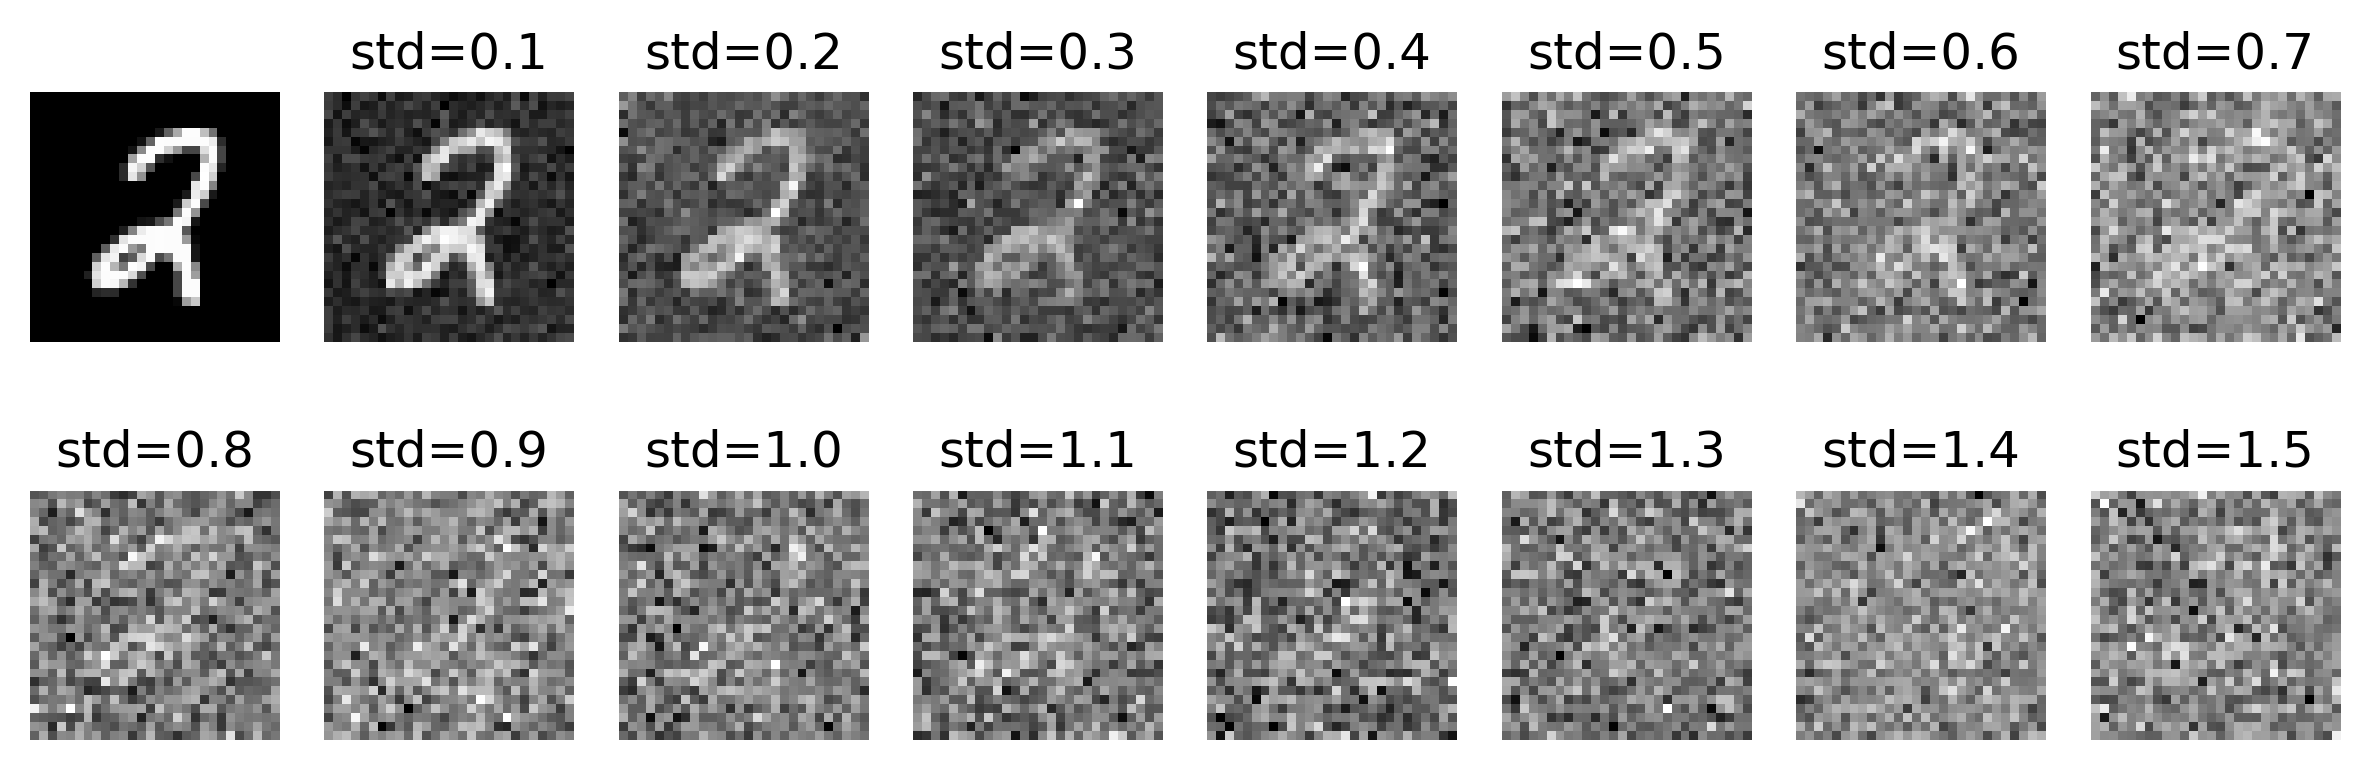

In [312]:
fig, axs = plt.subplots(2,8, dpi=300, figsize=(8,3))
axs = axs.flatten()
axs[0].imshow(example_digit, cmap='gray')

for i,nlevel in enumerate(np.arange(0.1,1.6,0.1)):
    noisy_digit = example_digit + (nlevel * torch.randn_like(example_digit))
    axs[i+1].imshow(noisy_digit, cmap='gray')
    axs[i+1].set_title(f'std={nlevel:.1f}')

for ax in axs:
    ax.axis('off')
fig.tight_layout()
# ax0.imshow(digits['0p0'], cmap='gray')
# ax0.axis('off')
# ax0.set_title('noise=.0')
# ax1.imshow(digits['0p1'], cmap='gray')
# ax1.axis('off')
# ax1.set_title('noise=.1')
# ax2.imshow(digits['0p2'], cmap='gray')
# ax2.axis('off')
# ax2.set_title('noise=.2')
# ax3.imshow(digits['0p3'], cmap='gray')
# ax3.axis('off')
# ax3.set_title('noise=.3')
# ax4.imshow(digits['0p4'], cmap='gray')
# ax4.axis('off')
# ax4.set_title('noise=.4')
# ax5.imshow(digits['0p5'], cmap='gray')
# ax5.axis('off')
# ax5.set_title('noise=.5')
# fig.tight_layout()


In [295]:
ind = '1p2'
# model_tests = {}
# ex_digits = {}
# ex_digits['noise_i_0p1'] = x[2,:].reshape(28,28).cpu().numpy()
# model_tests['spike_record_noise_i_0p1'] = full_spike_record
# model_tests['mem_record_noise_i_0p1'] = full_mem_record
model_tests['targets_noise_i_{}'.format(ind)] = all_targets
model_tests['spike_record_noise_i_{}'.format(ind)] = full_spike_record
model_tests['mem_record_noise_i_{}'.format(ind)] = full_mem_record
# ex_digits['noise_i_0p5'] = x[2,:].reshape(28,28).cpu().numpy()

In [238]:
# performance = np.zeros(10)

In [223]:
# performance = np.zeros(10)
# performance[0] = 0.8448
# performance[1] = 0.837
# performance[2] = 0.8246
# performance[3] = 0.8246
# performance[4] = 0.7201

In [260]:
# performance1 = np.zeros(20)
# performance1[:10] = performance.copy()

In [296]:
correct = np.zeros(test_loader.dataset.targets.shape)
pred = np.zeros(test_loader.dataset.targets.shape)
_c = 0
for i in range(len(model_tests['mem_record_noise_i_{}'.format(ind)])):
    for j in range(np.size(model_tests['mem_record_noise_i_{}'.format(ind)][i], 1)):
        pred[_c] = model_tests['spike_record_noise_i_{}'.format(ind)][i][-1,j,:].argmax()
        targ = int(model_tests['targets_noise_i_{}'.format(ind)][i][j])
        correct[_c] = pred[_c] == targ
        _c += 1
performance1[12] = np.sum(correct)/len(correct)

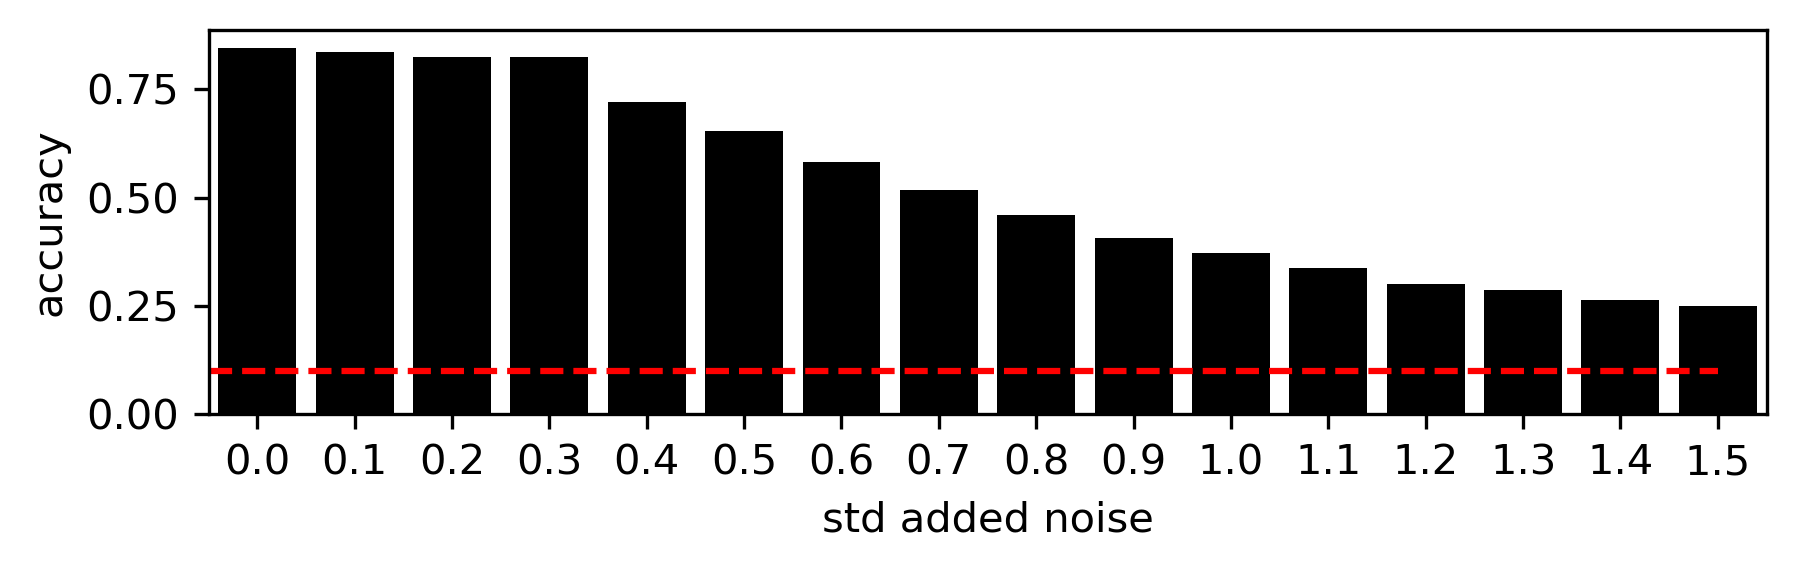

In [297]:
plt.figure(figsize=(6,2), dpi=300)
for i in range(len(performance1)):
    plt.bar(i, performance1[i], color='k')
plt.xticks(range(16), labels=[np.round(x,2) for x in np.arange(0,1.6,0.1)])
plt.xlabel('std added noise')
plt.ylabel('accuracy')
plt.hlines(0.1, -0.5, 15, color='r', linestyle='--')
plt.xlim(-0.5,15.5)
plt.tight_layout()

In [363]:
np.where(all_targets[0]==2)

(array([ 11,  16,  18,  35,  44,  50,  57,  70,  91, 121, 125, 131, 133,
        147, 164, 173, 178, 183, 187, 194, 219, 241, 266, 273, 276, 290,
        291, 310, 314, 325, 336, 348, 349, 369, 385, 391, 406, 414, 424,
        427, 432, 435, 447, 448, 460, 463, 468, 469, 470, 476, 478, 483,
        485, 490, 495, 504, 509], dtype=int64),)

In [364]:
all_targets[0][11]

tensor(2)

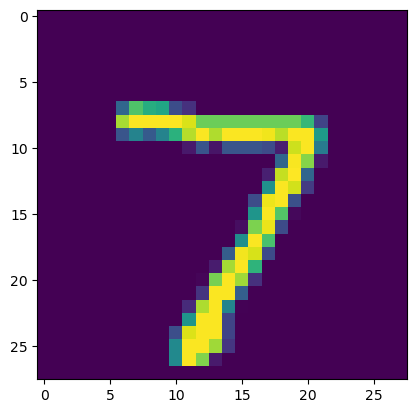

In [322]:
plt.imshow(test_loader.dataset.test_data[0])

(0.0, 81.0)

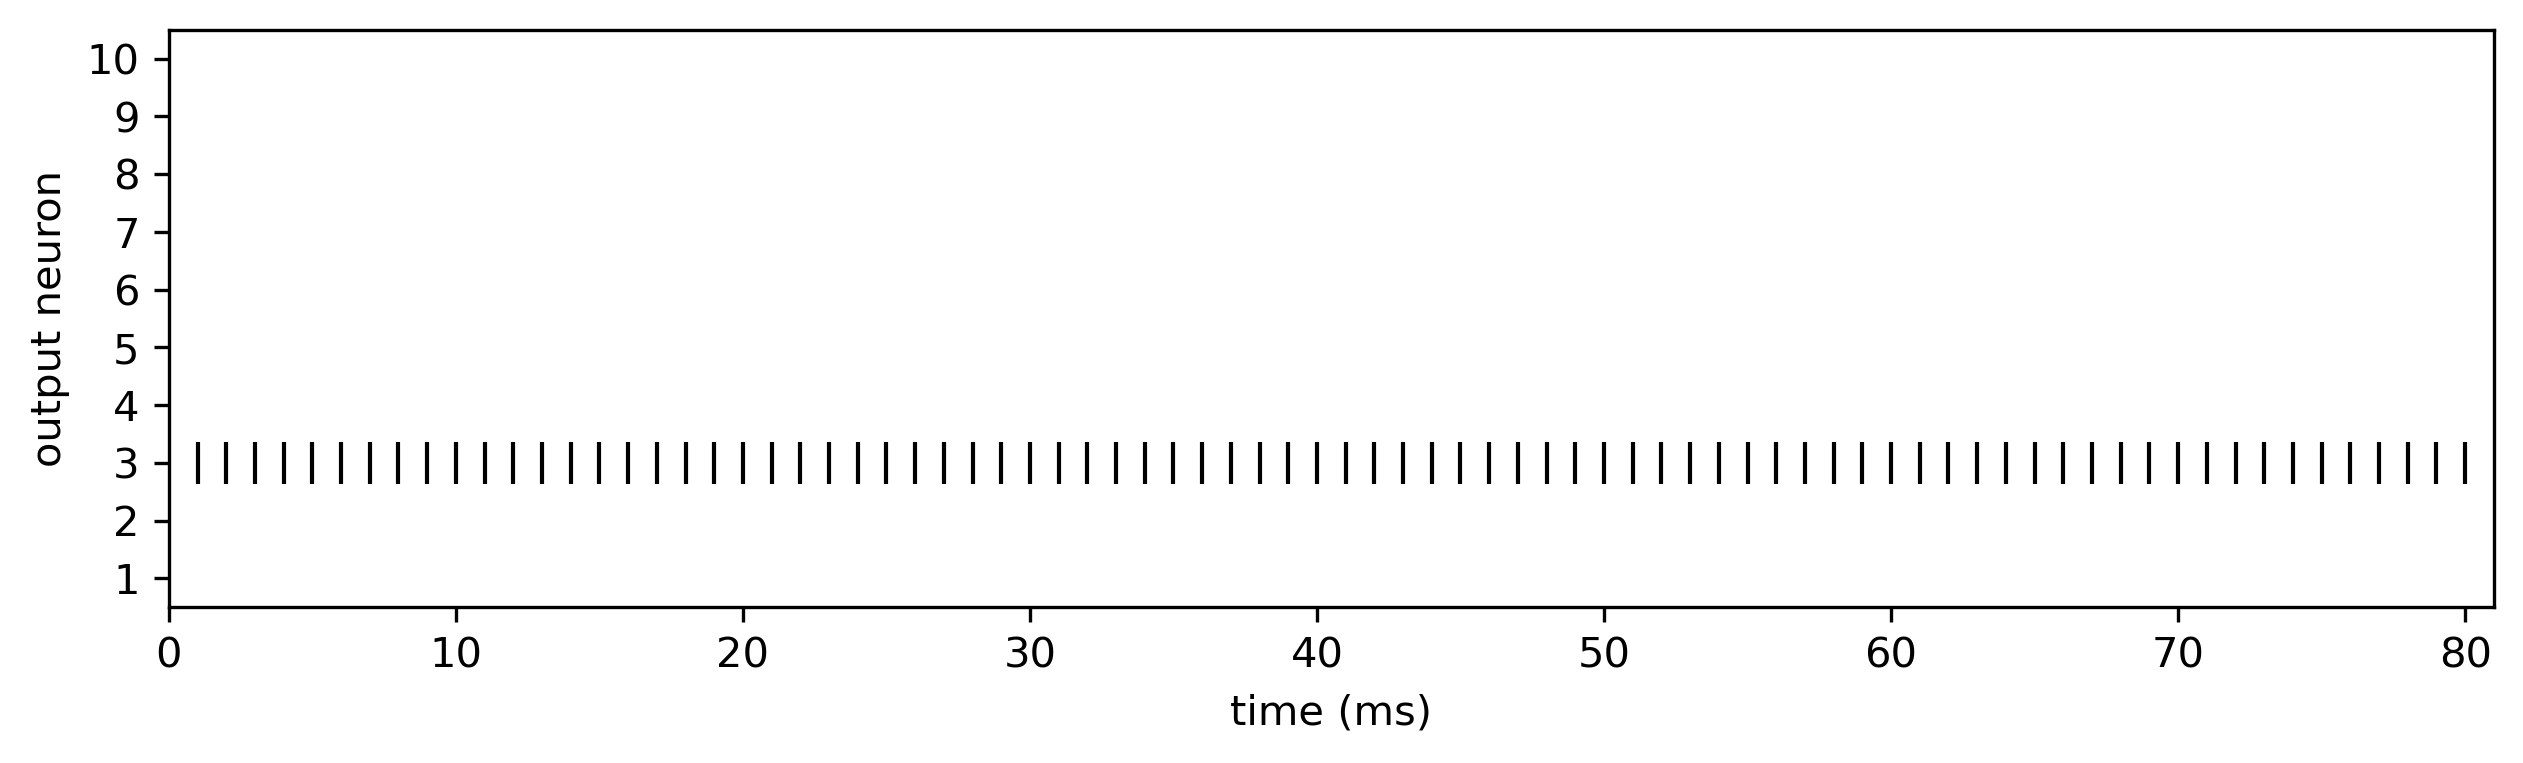

In [369]:
plt.figure(figsize=(10,2.5),dpi=300)
for i in range(10):
    sp = np.where(full_spike_record[0][:,11,i])[0]
    plt.plot(sp, np.ones(len(sp))*(i+1), '|', color='k',ms=10)
plt.ylim([0.5,10.5])
plt.yticks(np.arange(1,11,1))
plt.xlabel('time (ms)')
plt.ylabel('output neuron')
plt.xlim([0,81])

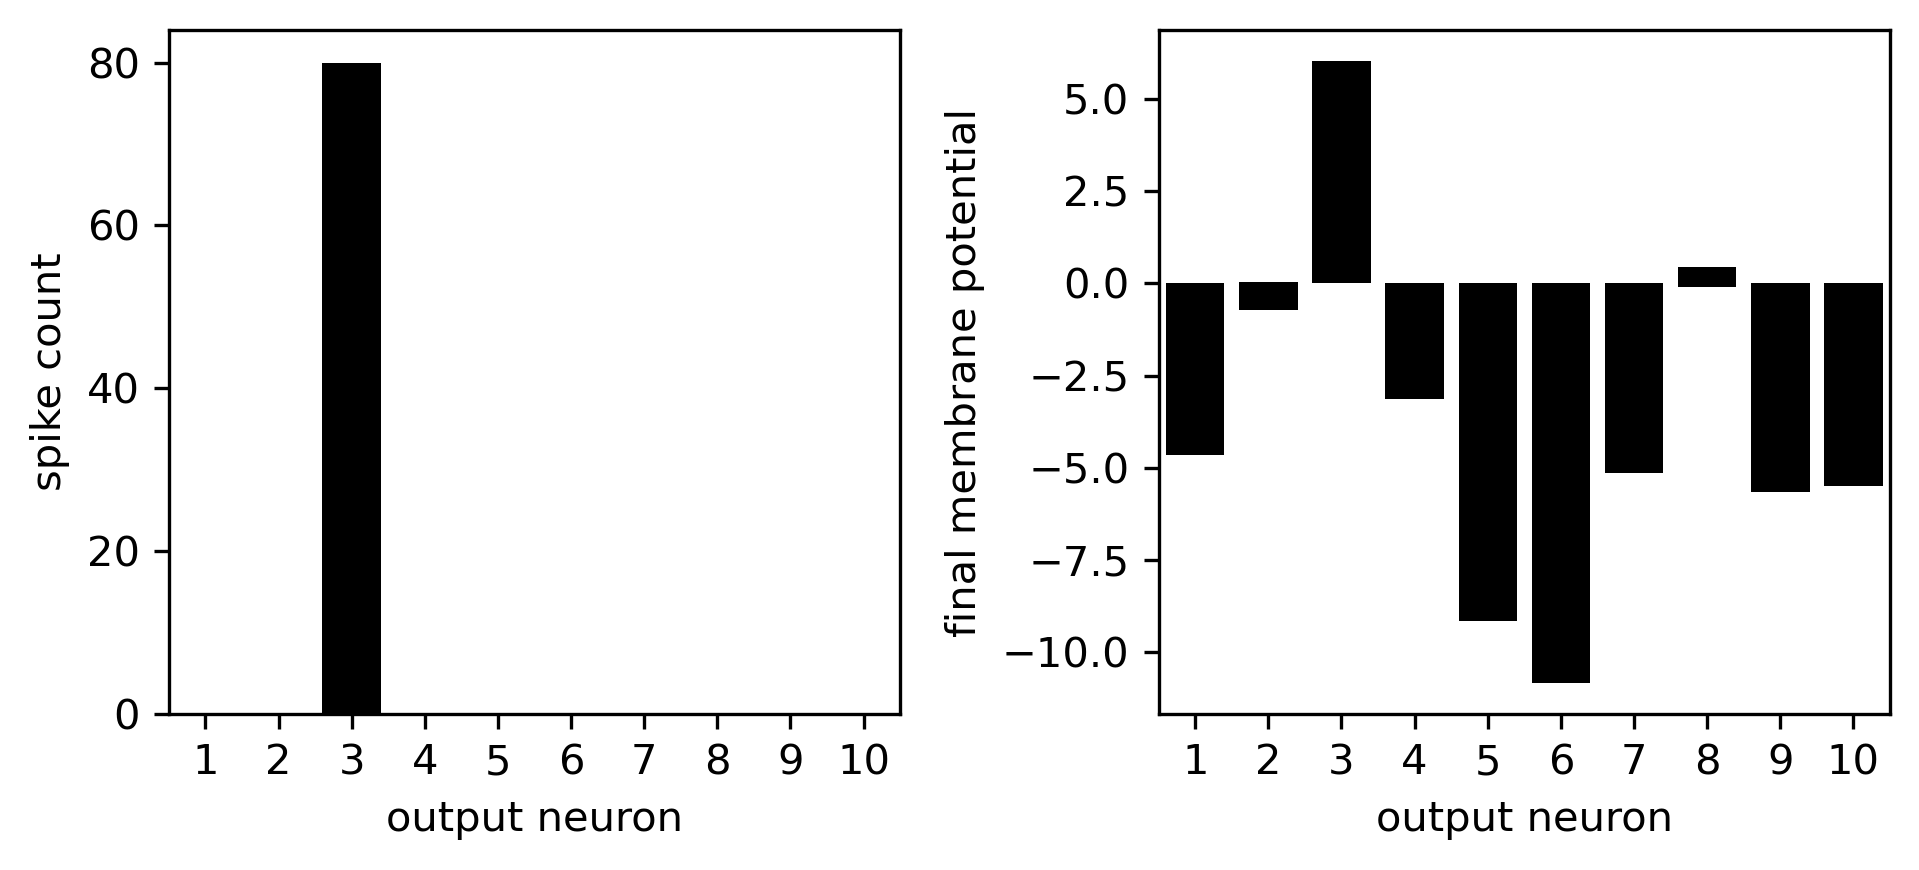

In [367]:
fig, [ax1,ax2] = plt.subplots(1,2,dpi=300,figsize=(6.5,3))
for i in range(10):
    ax1.bar(i+1, np.sum(full_spike_record[0][:,11,i].numpy()), color='k')
# plt.ylim([0,82])
ax1.set_xticks(np.arange(1,11,1))
ax1.set_xlabel('output neuron')
ax1.set_ylabel('spike count')
ax1.set_xlim(.5,10.5)

for i in range(10):
    ax2.bar(i+1, full_mem_record[0][:,11,i].numpy(), color='k')
ax2.set_xlabel('output neuron')
ax2.set_ylabel('final membrane potential')
ax2.set_xticks(np.arange(1,11,1))
ax2.set_xlim(0.5,10.5)

fig.tight_layout()

In [5]:
all_test_spk, all_test_mem = [], []
all_test_data, all_test_targets = [], []
with torch.no_grad():
    model.eval()
    for test_data, test_targets in iter(test_loader):
    
        # test_data, test_targets = next(iter(test_loader))
        test_data = test_data.to(device)
        test_targets = test_targets.to(device)

        # Test set forward pass
        test_spk, test_mem = model.fwd_frozen(test_data.view(batch_size, -1))
        all_test_spk.append(test_spk)
        all_test_mem.append(test_mem)
        all_test_data.append(test_data)
        all_test_targets.append(test_targets)